In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from astropy.io import ascii
from utils import col_names, relevant_indices, normalise_sdss_class

In [60]:
datasets = "../datasets/SuperCOSMOS/"
img_path = "../img/"

In [3]:
%%time
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
ukr823_df = ascii.read(datasets + "UKR823/sssedrpair.dat").to_pandas()
ukj823_df = ascii.read(datasets + "UKJ823/sssedrpair.dat").to_pandas()

CPU times: user 3.9 s, sys: 140 ms, total: 4.04 s
Wall time: 4.05 s


In [4]:
uki823_df.columns = col_names
ukr823_df.columns = col_names
ukj823_df.columns = col_names

In [5]:
# Preprocess
normalise_sdss_class(uki823_df)

In [37]:
uki823_df[['CLASS', 'CLASS_SDSS']]
matrix_full = confusion_matrix(uki823_df['CLASS'], uki823_df['CLASS_SDSS'])
matrix_true = matrix_full[:2,:2]
matrix_incorrect = matrix_full[2:,:2]
matrix_full[:2]

array([[4537, 3612,    0,    0],
       [1225, 6191,    0,    0]])

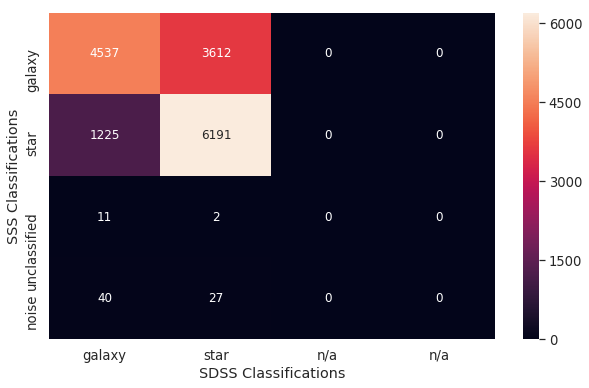

In [64]:
matrix_df = pd.DataFrame(matrix_full, index=["galaxy","star","unclassified","noise"], columns=["galaxy","star","n/a","n/a"])
plt.figure(figsize = (10,6))
sn.set(font_scale=1.2)
sn.heatmap(matrix_df, annot=True, fmt='g', annot_kws={"size": 12})
plt.xlabel("SDSS Classifications")
plt.ylabel("SSS Classifications")
plt.savefig(img_path + "sdss-sss-classification-confusion-matrix.png", bbox_inches='tight')